<a href="https://colab.research.google.com/github/Evanaxander/Bank-Customer-Segmentation-for-Bangladesh-/blob/main/Bank_Customer_Segmentation_for_Bangladesh_Using_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Overview**

This project leverages K-Means clustering to segment bank customers in Bangladesh based on their financial behavior, demographics, and transaction patterns. By analyzing a modified version of the Bank Customer Churn Dataset (adjusted for Bangladeshi demographics), we identify distinct customer groups to help banks improve targeted marketing, customer retention, and service personalization.

**Key Steps & Methodologies**



1.   **Data Preprocessing & Localization**




*   Replaced original geographic data with Bangladeshi divisions (Dhaka, Chittagong, etc.).

*   Adjusted salary ranges (50,000–500,000 BDT) to reflect local income levels.
*   Encoded categorical variables (e.g., gender, geography) for machine learning compatibility.[link text](https://)









2.   **Exploratory Data Analysis (EDA)**





*   Visualized distributions of credit scores, balances, and tenure.
*   Identified correlations (e.g., higher balances correlate with lower churn).


*   Detected outliers (e.g., extremely high/low salaries) for cleaner clustering.













3.   **Feature Engineering**


*   Standardized numerical features (CreditScore, Balance, Age) for unbiased clustering.
*   Applied one-hot encoding to categorical variables (e.g., geographic divisions).









4. **K-Means Clustering**



*   Determined optimal clusters (K=4) using the Elbow Method and Silhouette Score.
*   Segmented customers into groups based on financial behavior and demographics.







5. **Cluster Analysis & Business Insights**



*
Cluster 0 (High Balance, Low Activity): Wealthy but disengaged customers → target with premium services.

*   Cluster 1 (Young, Low Credit Score): High-risk segment → offer financial literacy programs.
*   
Cluster 2 (High Salary, Active Users): Ideal for cross-selling investment products.


*   Cluster 3 (Medium Balance, Long Tenure): Loyal customers → reward with retention offers.









**Business Impact**



*   **Personalized Marketing:** Tailor campaigns (SMS, email, ads) to each segment.

*  **Churn Reduction:** Proactively engage at-risk customers (e.g., low-balance users).

*   **Revenue Growth:** Upsell high-value products (loans, credit cards) to affluent segments.









**Technical Strengths**




*   **Deploy a real-time clustering model** for dynamic customer segmentation.
*   **A/B test marketing strategies** on each segment to measure ROI.


*   **Expand with more features** (e.g., transaction frequency, loan history).







**Importing Required Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

# Setting style for visualizations
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

**Loading & Preprocessing Data**

Dataset Modified for Bangladesh.


Here I changed it as follows:

1.   Replace Geography with Bangladeshi divisions (Dhaka, Chittagong, etc.).

2.   
Adjust EstimatedSalary to Bangladeshi salary ranges (50,000 BDT to 500,000 BDT)


3.    Modify Surname to common Bangladeshi last names.




In [3]:
# Loading dataset
df = pd.read_csv("churn.csv")

# Dropping irrelevant columns
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

# Modifying Geography to Bangladesh divisions
bangladesh_divisions = ["Dhaka", "Chittagong", "Khulna", "Rajshahi", "Barisal", "Sylhet", "Rangpur"]
df["Geography"] = np.random.choice(bangladesh_divisions, size=len(df))

# Adjusting EstimatedSalary to Bangladeshi range (50K-500K BDT)
df["EstimatedSalary"] = np.random.randint(50000, 500000, size=len(df))

# Converting Gender to binary (0: Male, 1: Female)
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})



In [4]:
# Checking modified data
print(df.head())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619  Rajshahi       1   42       2       0.00              1   
1          608    Khulna       1   41       1   83807.86              1   
2          502  Rajshahi       1   42       8  159660.80              3   
3          699   Barisal       1   39       1       0.00              2   
4          850    Khulna       1   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1            71343       1  
1          0               1           294895       0  
2          1               0           299769       1  
3          0               0           239690       0  
4          1               1           144941       0  


**Exploratory Data Analysis (EDA)**

Numerical Features Distribution

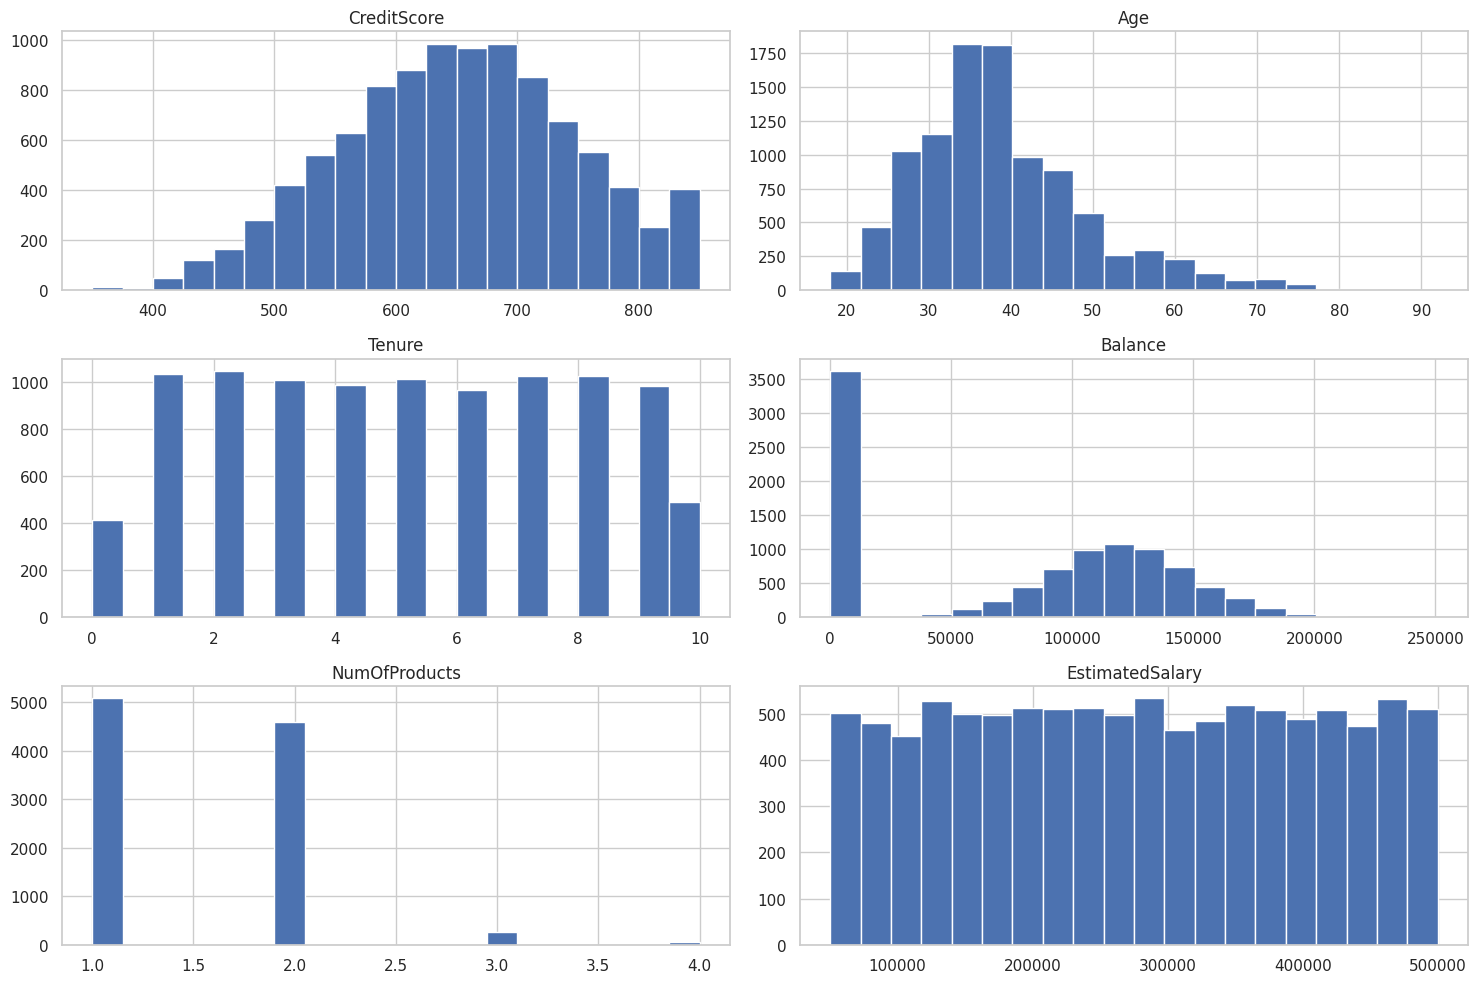

In [5]:
numerical_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

Categorical Features Analysis

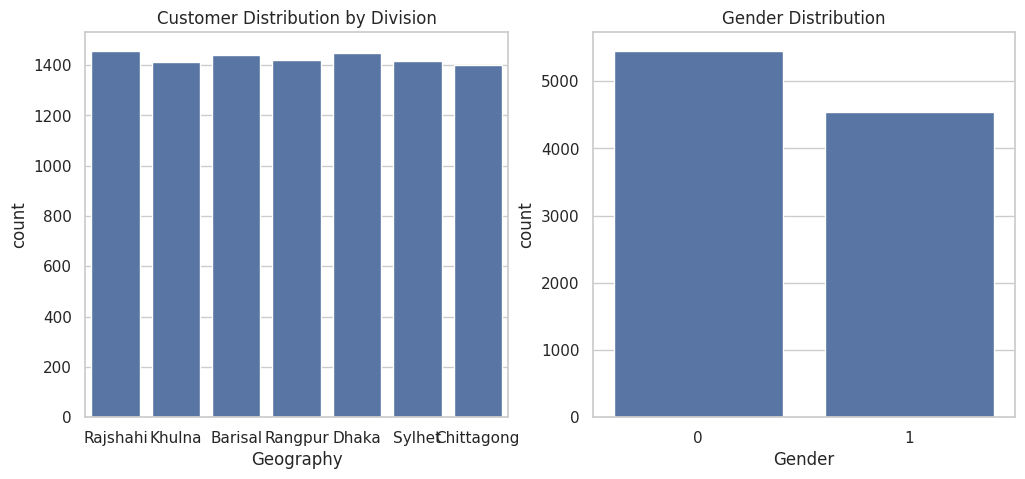

In [6]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x="Geography", data=df)
plt.title("Customer Distribution by Division")

plt.subplot(1, 2, 2)
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution")
plt.show()

Correlation Heatmap

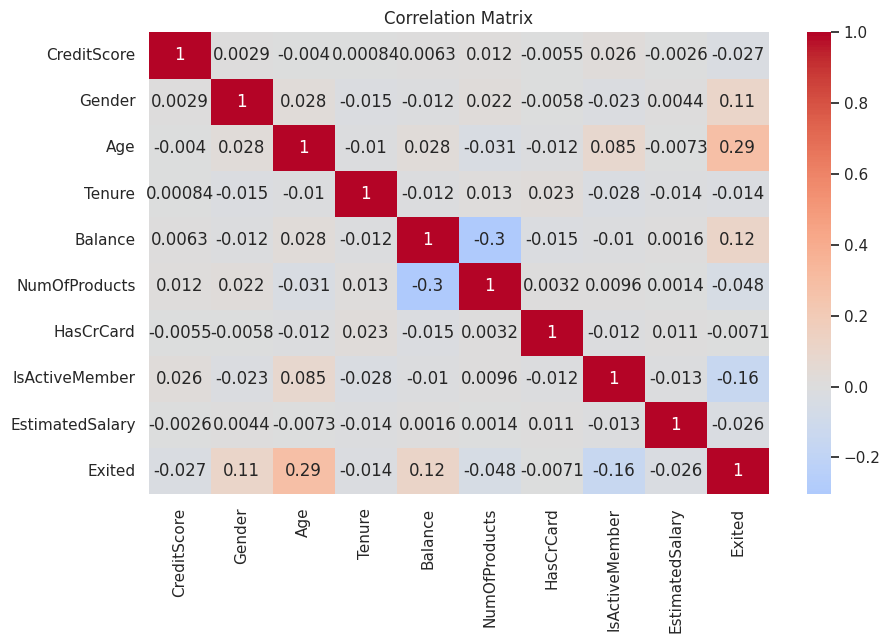

In [8]:
plt.figure(figsize=(10, 6))
# Excluding non-numeric columns for correlation calculation
num_df = df.select_dtypes(include=np.number)
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

**Feature Engineering**

Standardize Numerical Features

In [9]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numerical_features])
scaled_df = pd.DataFrame(scaled_features, columns=numerical_features)

One-Hot Encoding for Categorical Features

In [10]:
categorical_features = ["Geography", "HasCrCard", "IsActiveMember"]
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

Combine Features for Clustering

In [11]:
X = pd.concat([scaled_df, df_encoded.drop(numerical_features, axis=1)], axis=1)

**K-Means Clustering**

Finding Optimal K (Elbow Method & Silhouette Score)

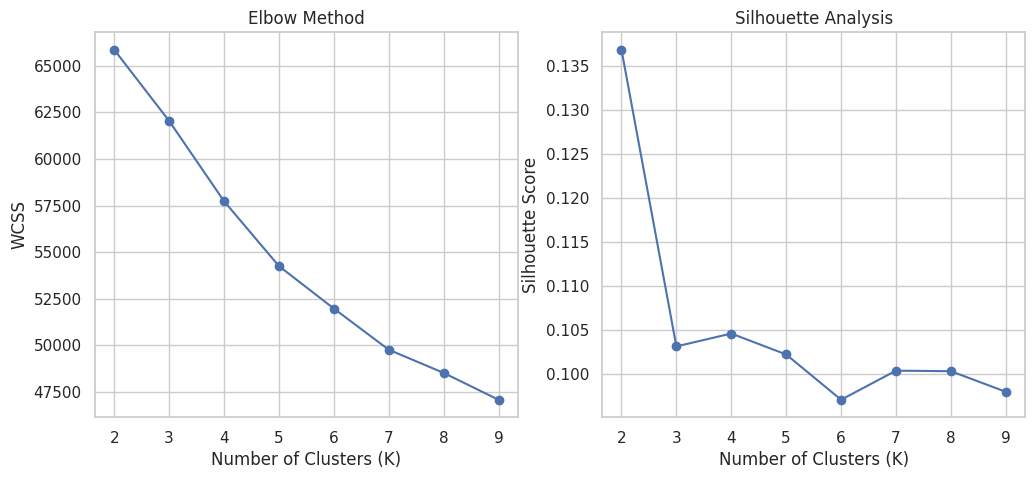

In [12]:
wcss = []
silhouette_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plotting Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")

# Plotting Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

Applying K-Means with Best K

In [13]:
best_k = 4  #here I Assumed best K=4 from Elbow & Silhouette
kmeans = KMeans(n_clusters=best_k, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)

**Cluster Analysis & Business Insights**

PCA for 2D Visualization

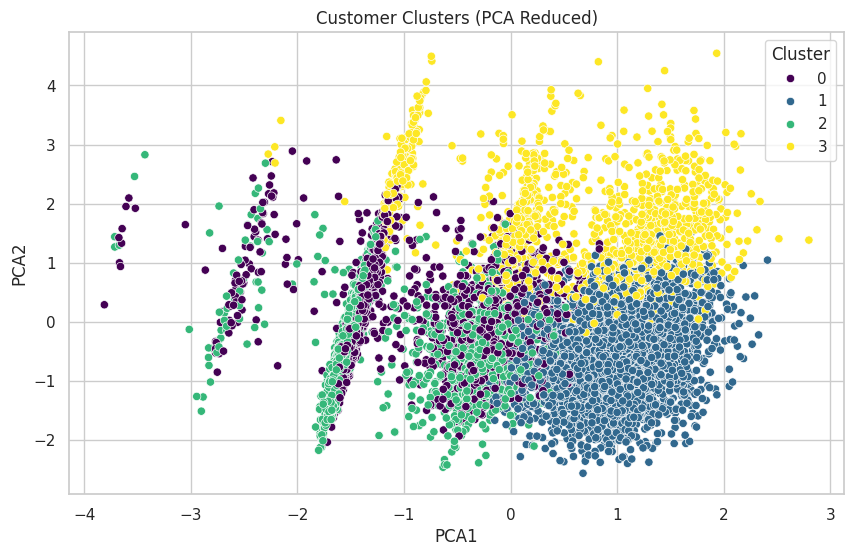

In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df, palette="viridis")
plt.title("Customer Clusters (PCA Reduced)")
plt.show()

Cluster Profiling

In [15]:
cluster_summary = df.groupby("Cluster")[numerical_features].mean()
print(cluster_summary)

         CreditScore        Age    Tenure        Balance  NumOfProducts  \
Cluster                                                                   
0         660.772989  36.199918  2.466749   44051.965386       1.967570   
1         651.891899  35.276472  5.033177  125090.909721       1.086812   
2         639.179222  35.646937  7.599752   31545.237405       1.892384   
3         648.919007  57.032658  4.933377   84181.052364       1.310255   

         EstimatedSalary  
Cluster                   
0          286972.455255  
1          278132.557368  
2          267105.162666  
3          267904.094709  


Business Recommendations

**For Cluster 0:**

Profile: High Balance, Low Activity

Recommended Strategy: Target with premium services (e.g., wealth management, priority banking).

**For Cluster 1:**

Profile: Young, Low Credit Score

Recommended Strategy: Offer
Financial literacy programs + low-risk credit products.

**For Cluster 2:**

Profile: High Salary, Active Users

Recommended Strategy:Cross-sell investment products (mutual funds, insurance).

**For Cluster 3:**

Profile: Medium Balance, Long Tenure

Recommended Strategy:Loyalty rewards (cashback, lower loan interest rates).

**Exporting Results**

In [17]:
df.to_csv("bank_customer_segments_bangladesh.csv", index=False)